In [46]:
# From: https://github.com/vibhor98/Neural-Machine-Translation-using-Keras

In [51]:
import numpy as np
# x = np.ndarray(3, dtype='str')
# x[1] = 'ksd'

In [52]:
# a = np.array([[1, 2, 3], [4, 5, 6]])
# a = np.empty((0,3))
 
# newArray = np.append(a, [[50, 60, 70]], axis = 0)
# print(newArray)
# print(type(newArray))

In [53]:
# b = np.empty((0, 2), dtype = 'str')
# to_append = np.empty(0, dtype = 'str')
# to_append = np.append(to_append, ['hi'], axis = 0)
# to_append = np.append(to_append, ['hi'], axis = 0)
# print(to_append)
# print(to_append.shape)
# b = np.append(b, [to_append], axis = 0)
# print(b)

In [522]:
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint
from nltk.stem.snowball import FrenchStemmer
from nltk.stem.porter import *
import matplotlib.pyplot as plt

eng_stemmer = PorterStemmer()
french_stemmer = FrenchStemmer()

In [745]:
# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

In [746]:
# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)


# encode and pad sequences
def encoder(tokenizer, length, lines):
    X = tokenizer.texts_to_sequences(lines)
    # pad sequences with 0 values
    X = pad_sequences(X, maxlen=length, padding='post')
    return X


# one hot encode target sequence
def decoder(sequences, vocab_size):
	y_ = []
	for sequence in sequences:
		encoded = to_categorical(sequence, num_classes=vocab_size)
		y_.append(encoded)
	y = array(y_)
	y = y.reshape(sequences.shape[0], sequences.shape[1], vocab_size)
	return y

In [747]:
# define NMT model
def define_model(src_vocab, tgt_vocab, src_timesteps, tgt_timesteps, hidden_size):
    model = Sequential()
    model.add(Embedding(src_vocab, hidden_size, input_length=src_timesteps, mask_zero=True))
    model.add(LSTM(n_units, return_sequences=True))
    model.add(TimeDistributed(Dense(tgt_vocab, activation='softmax')))
return model

In [798]:
def read_data_diff(): 
    src_data  = open("./training-giga-fren/giga-fren.release2.fixed.fr", "r")
    tgt_data = open("./training-giga-fren/giga-fren.release2.fixed.en", "r")

#     dataset = np.ndarray((22521, 2), dtype='str')


    dataset = np.empty((0, 2), dtype = 'str')
    
#     print(stemmer.stem('voudrais'))

    i = 0
#     with open("./training-giga-fren/giga-fren.release2.fixed.fr", "r") as src_data:
#         with open("./training-giga-fren/giga-fren.release2.fixed.en", "r") as tgt_data:
#             for line1, line2 in zip(src_data, tgt_data):
#                 if i%100000==0: 
#                     to_append = np.empty(0, dtype = 'str')
#                     to_append = np.append(to_append, [line1], axis = 0)
#                     to_append = np.append(to_append, [line2], axis = 0)
#                     dataset = np.append(dataset, [to_append], axis = 0)
#                 if (i % 100000 == 0): print(i//100000)
#                 i+=1
                
    with open("./training-giga-fren/giga-fren.release2.fixed.fr", "r") as src_data:
        with open("./training-giga-fren/giga-fren.release2.fixed.en", "r") as tgt_data:
            for line1, line2 in zip(src_data, tgt_data):
#                 print(i)
                if len(dataset) >= 4000: 
                    break
                else: 
                    print(line1, line2)
                    new_line1 = ""
                    new_line2 = ""
                    if (len(line1.split(" ")) < 4) and (len(line2.split(" ")) < 4):
                        should_we_append = True
                        all_words_longer = True
                        for word1 in line1.split(" "): 
                            if len(word1) > 8: should_we_append = False
                            if len(word1) < 3: all_words_longer = False
                            new_line1+=(french_stemmer.stem(word1)+ " ")
                        for word2 in line2.split(" "):
                            if len(word2) > 9: should_we_append = False
                            if len(word2) < 3: all_words_longer = False

                            new_line2+=(eng_stemmer.stem(word2) + " ")

                        if (not should_we_append): 
                            continue
                        to_append = np.empty(0, dtype = 'str')
                        to_append = np.append(to_append, [line1.lower()], axis = 0)
                        to_append = np.append(to_append, [line2.lower()], axis = 0)
                        dataset = np.append(dataset, [to_append], axis = 0)
                        print(len(dataset))
                    
                


    return dataset


In [799]:
dataset = read_data_diff()


Il a transformé notre vie | Il a transformé la société | Son fonctionnement | La technologie, moteur du changement Accueil | Concepts | Enseignants | Recherche | Aperçu | Collaborateurs | Web HHCC | Ressources | Commentaires Musée virtuel du Canada
 Changing Lives | Changing Society | How It Works | Technology Drives Change Home | Concepts | Teachers | Search | Overview | Credits | HHCC Web | Reference | Feedback Virtual Museum of Canada Home Page

Plan du site
 Site map

1
Rétroaction
 Feedback

Crédits
 Credits

2
English
 Français

3
Qu’est-ce que la lumière?
 What is light ?

La découverte du spectre de la lumière blanche Des codes dans la lumière Le spectre électromagnétique Les spectres d’émission Les spectres d’absorption Les années-lumière La pollution lumineuse
 The white light spectrum Codes in the light The electromagnetic spectrum Emission spectra Absorption spectra Light-years Light pollution

Le ciel des premiers habitants La vision contemporaine de l'Univers L’astronomie

 He built a large spectroscopic laboratory and supervised the research of several students and guest researchers.

En 1935, Herzberg quitte l'Allemagne nazi (les autorités allemandes lui permettent de partir avec seulement $2.50!) et se réfugie au Canada, où il accepte un poste de professeur invité à l'Université de la Saskatchewan, à Saskatoon.
 The German authorities would only allow him to leave with about $2.50, and he sought refuge in Canada where he was offered a guest professorship at the University of Saskatchewan in Saskatoon.

Trois mois plus tard, il devient professeur au département de physique ; il y restera dix ans.
 Three months later, he became professor in the physics department, a position he occupied for the next six years.

Ses travaux portent essentiellement sur la spectroscopie moléculaire, c'est-à-dire sur l'analyse de la structure des molécules.
 His work focused mainly on molecular spectroscopy; that is, on the analysis of molecular structure.

Herzberg se conc

 Cosmic background radiation – that amazing "first light" emitted when the Universe was only a few hundred thousand years old – exists mainly in the form of microwaves.

Pour les longueurs d’ondes encore plus grandes et moins énergétiques que les micro-ondes, dans le domaine des ondes radio, l’utilisation de grandes soucoupes de métal, ou radiotélescopes, est courante.
 Radio waves, which have even longer and less energetic wavelengths than microwaves, are typically collected using large metal dishes.

Dans l’espace, les ondes radio sont produites dans les restes de supernovae et par des électrons traversant les champs magnétiques des lointaines radiogalaxies.
 Radio waves are produced by supernova remnants and by electrons passing through the magnetic fields of distant radio galaxies.

Pour les longueurs d’ondes plus petites que la lumière visible, c’est-à-dire les rayons ultraviolets, l’usage de télescopes optiques est permis.
 For light with wavelengths that are shorter than those o

Séquence vidéo  Hubert Reeves parle de ce qu'est la pollution lumineuse.
 Video sequence   Hubert Reeves talks about light pollution.

Activité Pollution lumineuse Précédent © 2006 Une idée originale et une réalisation de L'ASTROLab du Parc national du Mont-Mégantic
 Light pollution activitie Previous © 2006 An original idea and a realization of the ASTROLab of Mont-Mégantic National Park

La pollution lumineuse Description et instructions La pollution lumineuse a fait disparaître 95 % des étoiles dans le ciel.
 Luminous Pollution Activity Instructions Luminous pollution is 95% responsible for the disappearance of stars in the sky.

Cliquez sur les différents éléments du dessin pour voir jusqu’à quel point la pollution lumineuse est néfaste pour la planète entière.
 Click the different items in the drawing to see just how bad luminous pollution is for the entire planet.

Par la suite, choisissez d’éclairer ce qui est vraiment essentiel.
 Then choose to light what is really necessary.



12
Carte interactive L'aventure astronomique canadienne La lumière L'univers Visions célestes
 Interactive map A journey iinto Canadian astronomy Light Universe Celestial visions

• Qu’est-ce que la lumière?
 • What is light ?

• La découverte du spectre de la lumière blanche
 • The white light spectrum

• Des codes dans la lumière
 • Codes in the light

• Le spectre électromagnétique
 • The electromagnetic spectrum

• Les spectres d’émission
 • Emission spectra

• Les spectres d’absorption
 • Absorption spectra

• Les années-lumière
 • Light-years

• La pollution lumineuse
 • Light pollution

• Le ciel des premiers habitants
 • The sky of the first inhabitants

• La vision contemporaine de l'Univers
 • A contemporary vison of the Universe

• L’astronomie pour tous
 • Astronomy for everyone

• Bande dessinée
 • Cartoon

• Liens
 • Links

13
• Glossaire
 • Glossary

• Observatoires
 • Observatories

• Astronomes
 • Astronomers

• Vidéo d'introduction
 • Introduction video

• Qu'est-ce q

 Vi

59
o u nt M elville Pa r r y S ou n d
 sc o ville unt Mel Pa r r y Sou n d MC h lin to ck C

C h a n n e l La nc
 C h a n n e l La

So un d as te r
 d r So un nc as te

B
 Ba

60
n fi
 y

61
OCÉAN ARCTIQUE Littoral Mackenzie Autres aires principaux D ét le rc e Ce tiqu c ar
 ARCTIC OCEAN Seaboard Mackenzie Other major areas D av cC irc le

Aire de drainage interne Aire de drainage dérivé Glaciers
 Internal drainage area Diverted drainage area Glaciers

ha
 nn

62
ro
 el

63
nn
 is

64
C o ro n G u l f a t io n
 of Boo thia g illin Nett Lake

Ri
 Cu m

65
L Athaba a
 be rl

66
C
 and

67
C
 Sound

68
sca ch
 0º

69
É
 R

70
Hud B a i e d Reindeer Lake
 k Bac B a c k

son
 R iv er

71
au
 Fo

72
x
 xe

73
Fe
 k djua Ama Lake

uil
 M

74
tra
 i

75
nc
 Ch

76
Wil
 an

77
listo La n ke
 Frob i s her Bay

les
 A

78
on
 C

79
I
 K

80
ie Ba a va ng dU E
 Gre Slavat Lake e

L
 Hu

81
r ab
 dso

82
tro
 N

83
e it d
 Dix

84
T
 Z

85
L N A A G R Ø NE ( DA AL
 va ga Un ay B I les

LA
 

252
T
 La

253
Da
 ad S

254
Cerc
 or

255
hit
 P O

256
eh
 A C

257
ors
 C

258
Iqa e
 McM Fort urray

259
luit
 Hudso

260
S
 2001 POPULATION

S K
 Proportion of population (%)

c W
 AR C

261
Proportion de Densité de population population (%) (habitants / km2)
 T IC O C

in d
 Ar

262
nRouy nda Nora
 CANADA

263
S-UN
 S T A T E S

Densité de la population, 2001
 Thunder Bay

D AMÉR I Q U E
 Timmin

Thunder Bay
 s

264
int Sa hn Jo
 nRouy nda Nora

er Great ry Sudbu
 H ali f ax

O
 O N

265
É
 E

266
I Q
 T

267
U
 L

268
Habitants par kilomètre carré, selon les divisions de rencensement 0 Échelle 125 250 375 km
 Persons per square kilometre, by census division 0 Scale 125 250 375 km

CARTON
 INSET

269
É-U dA
 USA

270
Échelle 250
 Scale 250

271
Me
 L in

272
e rd
 co

273
Dét de Nares
 s St r

274
LA
 N

275
D
 QU

276
ÎL
 EE

277
(G
 R

278
Be
 AL

279
M
 (G

280
Queen M aud Gulf
 S of Boo thia

Sound
 sk

281
F M airw 4 oun ea 6 6 ta t h 3 in er m
 C or o G ulnat io n f

Fro

 ew

Territoire du Yukon
 River

st
 ps

386
is
 Calgary

387
Frobisher Bay Mer du Labrador Baie dUngava
 Saskatoon Regina Winnipeg

Whitehorse
 Sandy Lake

Territoire du Yukon
 James Bay

Océan Britannique Prince Pacifique George Victoria
 rc A is S tr ai

ew
 Is

388
ch
 la

389
ch
 nd

390
Ka Calgary Van mloo ps cou ver
 Atlantic Ocean 14 0º

En 1949, Terre-Neuve se joint à la Confédération en tant que dixième province avec ses limites telles que définies en 1927.
 In 1949, Newfoundland enters Confederation as the tenth province with the boundaries as delimited in 1927.

L'histoire longue et diversifiée de la colonisation au Canada se traduit par deux configurations distinctes des limites, qui différencient le Canada oriental du Canada occidental.
 Canadas long and diversified settlement history is reflected in the two distinct patterns of boundaries that differentiate between eastern and western Canada.

Les limites orientales suivent les éléments du relief tels que les bassins h

541
HN de
 N

542
E S N
 A S E L e s s e r (Bonaire, Curaçao, Sint Maarten)

t a sca
 t i A n VE Isla Orchila

A
 e

543
S Ï B P eEt i t e NL Aruba Curaçao Bonaire NL
 Saint Vincent and The Grenadines Grenada

A n Isla Orchila
 t a sca NL

(Bonaire, Curaçao, Sint Maarten)
 Nederlandse Antillen Curaçao Bonaire NL

Trinité -etTobago
 Trinidad and Tobago

El Salvador Océan Pacifique 10º
 El Salvador

co
 Guyana

544
Guyane
 Embalse de Guri

545
Embalse de Guri
 Pacific Ocean 10º

546
Colombie
 Colombia

S U D Brésil
 A M E R I C A Brazil

Mer de Norvège
 Macke n z ie R iv er

Cercle Arctique
 Arctic Circle

ve Ma c
 Norwegian Sea

547
Islande nz DK
 Arctic Circle

548
ke
 Iceland DK

549
è o rv
 o rw

550
Russie Ozero Baykal
 Russia Ozero Baykal

551
Baie d’Hudson
 US Bering Sea

US Mer de Béring
 Gulf of Alaska

Mer du Nord
 SE Sea DK Russia

RoyaumeUni Irlande
 United Denmark Kingdom Netherlands

Danemark DK
 Sea of Okhotsk RU

SE Baltique Russie
 Bering Sea US US

Mer d’Okhotsk RU
 US


 Functions of the International Freight Forwarder According to the CIFFA, the most elementary role of the international freight forwarder is to arrange for the movement of goods from point A to point B, in accordance with the client's instructions, in the most economical, timely and safe fashion.

Les dix fonctions principales d'un transitaire sont celles qui suivent.
 The ten major functions a forwarder can perform are: 1.

Le transitaire peut recommander l'itinéraire optimal (économique, opportun et sûr) et faire les réservations auprès d'un transporteur.
 Freight forwarders can recommend the best (economical/timely/safe) routing and book space with a carrier.

Un acheminement plus efficace peut améliorer la compétitivité des produits d'un exportateur sur de nouveaux marchés.
 Thanks to more efficient routing an exporter's goods may be more competitive in new markets.

Emballage :
 Packaging:

Le transitaire donne des conseils en matière d'emballage, de marquage, d'étiquetage et de c

 Exports of retail dog and cat food represented 8% of Canada’s agrifood exports to Israel in 2003.

100 des exportations de produits agroalimentaires en Israël.
 Israel was Canada’s 10th largest market for this product.

Le Canada a exporté pour 908 680 $ d’aliments pour chiens et pour chats destinés à la vente au détail en 2003, ce qui constituait une diminution de 660 680 $ comparativement à l’année précédente.
 Canada's Exports of Peas, dried or shelled 2.50 2.00 1.50 1.00 0.50 0.00 2001 2002 2003 2004 HS: 071310 Quantity in m illions of $ Quantity in m illions of kgs

En 2003, les exportations de pois séchés ou écalés comptaient pour 7 p.
 Export of peas, dried or shelled represented 7% of Canada’s agri-food exports to Israel in 2003.

100 des exportations canadiennes de produits agroalimentaires en Israël.
 Israel was Canada’s 36th largest market for this product.

Ce pays était le trente-sixième marché d’exportation du Canada pour ce produit.
 Canada exported $857 393 worth in 20

KeyboardInterrupt: 

In [786]:
print(len(dataset))
print(dataset[0])
print(dataset)
for i in range(0, len(dataset)): 
    if i%10==0: 
        print(dataset[i])

4000
['plan du site\n' 'site map\n']
[['plan du site\n' 'site map\n']
 ['crédits\n' 'credits\n']
 ['english\n' 'français\n']
 ...
 ['fmc\n' 'c\n']
 ['a culture\n' '52 potato weeds\n']
 ['s autre\n' 'bayer bayer\n']]
['plan du site\n' 'site map\n']
['• crédits\n' '• credits\n']
['partie 2 :\n' 'part 2:\n']
['vik\n' 'ffi\n']
['c\n' 's\n']
['rc\n' 'ar\n']
['n fi\n' 'y\n']
['son\n' 'r iv er\n']
['l\n' 'hu\n']
['o\n' 'p\n']
['s k\n' 'sc a\n']
['s\n' 'an\n']
['0º\n' 'l\n']
['hecate str\n' 'e\n']
['wi n\n' 'r\n']
['mer de norvège\n' 'norwegian sea\n']
['ab\n' 'la\n']
['îl\n' 'a\n']
['iq\n' 'co\n']
['t\n' 'co\n']
['be rl\n' 'harbo\n']
['on\n' 'va n\n']
['am\n' 'r\n']
['iq u\n' 'of\n']
['le\n' 'd\n']
['e\n' 'a\n']
['c\x96 w\n' 'ar c\n']
['échelle 250\n' 'scale 250\n']
['sound\n' 'sk\n']
['er\n' 'tra\n']
['la\n' 'dso\n']
['e\n' 'les\n']
['h\n' 's\n']
['i\n' 's\n']
['n\x92s\n' 'peawanuc\n']
['o inds\n' 'o inds la\n']
['le\n' 'great bear lake\n']
['iq ann\n' 'an\n']
['île\n' 'is\n']
['le rc ce\n' 

In [764]:
# dataset = np.ndarray(dataset)
# print(dataset[:,1])

In [787]:
print(len(dataset))
dataset_ = dataset
print(len(dataset_))
train_ = dataset[:int(len(dataset)*0.9)]
# train_ = dataset
# test_ = dataset
test_ = train_[0:int(len(train_)*0.2)]
# test_.extend(dataset_[int(len(dataset)*0.9):])

dataset = np.append(dataset, [to_append], axis = 0)

for i in range(int(len(dataset)*0.9), len(dataset)): 
    test_ = np.append(test_, [dataset[i]], axis = 0)
print(len(train_), len(test_))

4000
4000
3600 1121


In [788]:
# load datasets
# dataset = load_clean_sentences('english-german-both.pkl')
# train = load_clean_sentences('english-german-train.pkl')
# test = load_clean_sentences('english-german-test.pkl')


# format of dataset: [[src, tgt], [src, tgt]...]
# print(len(dataset))
# print(len(train), len(test)) 
# print(dataset)

In [789]:
# print(train[:, 1])
# print(train[:, 0])
# print(dataset[0][0])
# print(dataset_[0])
# print(type(dataset))

In [790]:
# prepare english tokenizer
# eng_tokenizer = create_tokenizer(dataset[:, 0])
# eng_vocab_size = len(eng_tokenizer.word_index) + 1
# eng_length = max_length(dataset[:, 0])
# print('English Vocabulary Size: %d' % eng_vocab_size)
# print('English Max Length: %d' % (eng_length))

# # prepare german tokenizer
# ger_tokenizer = create_tokenizer(dataset[:, 1])
# ger_vocab_size = len(ger_tokenizer.word_index) + 1
# ger_length = max_length(dataset[:, 1])
# ger_length = eng_length
# print('German Vocabulary Size: %d' % ger_vocab_size)
# print('German Max Length: %d' % (ger_length))


eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
print('English Vocabulary Size: %d' % eng_vocab_size)
print('English Max Length: %d' % (eng_length))

# prepare german tokenizer
fre_tokenizer = create_tokenizer(dataset[:, 1])
fre_vocab_size = len(fre_tokenizer.word_index) + 1
# fre_length = max_length(dataset[:, 1])
fre_length = eng_length
print('French Vocabulary Size: %d' % fre_vocab_size)
print('French Max Length: %d' % (fre_length))


English Vocabulary Size: 2276
English Max Length: 4
French Vocabulary Size: 2417
French Max Length: 4


In [791]:
# prepare training data
# trainX = encode_sequences(ger_tokenizer, ger_length, train[:, 1])
# trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])
# trainY = encode_output(trainY, eng_vocab_size)

trainX = encoder(fre_tokenizer, fre_length, train_[:, 0])
trainY = encoder(eng_tokenizer, eng_length, train_[:, 1])
trainY = decoder(trainY, eng_vocab_size)


# prepare validation data
testX = encoder(fre_tokenizer, fre_length, test_[:, 0])
testY = encoder(eng_tokenizer, eng_length, test_[:, 1])
testY = decoder(testY, eng_vocab_size)

print(trainX)

[[ 346 1108  125    0]
 [   0    0    0    0]
 [ 517    0    0    0]
 ...
 [   0    0    0    0]
 [  63   33    0    0]
 [  41    0    0    0]]


In [792]:
# define model
from keras import optimizers

model = define_model(fre_vocab_size, eng_vocab_size, fre_length, eng_length, 256)
SGD = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
nadam = optimizers.Nadam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

model.compile(optimizer=nadam, loss='categorical_crossentropy')

In [793]:
# Training Encoder-Decoder model to represent word embeddings and finally
# save the trained model as 'model.h5'

# summarize defined model
print(model.summary())
#plot_model(model, to_file='model.png', show_shapes=True)
# fit model
filename = 'model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = model.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY), callbacks=[checkpoint], verbose=2)




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_70 (Embedding)     (None, 4, 256)            618752    
_________________________________________________________________
lstm_94 (LSTM)               (None, 4, 256)            525312    
_________________________________________________________________
time_distributed_69 (TimeDis (None, 4, 2276)           584932    
Total params: 1,728,996
Trainable params: 1,728,996
Non-trainable params: 0
_________________________________________________________________
None
Train on 3600 samples, validate on 1121 samples
Epoch 1/20
 - 30s - loss: 5.3039 - val_loss: 5.0138

Epoch 00001: val_loss improved from inf to 5.01383, saving model to model.h5
Epoch 2/20
 - 5s - loss: 4.0389 - val_loss: 4.6767

Epoch 00002: val_loss improved from 5.01383 to 4.67673, saving model to model.h5
Epoch 3/20
 - 5s - loss: 3.5793 - val_loss: 4.4910

Epoch 00003: val_loss improv

In [794]:
print(len(train_), len(test_))

3600 1121


dict_keys(['val_loss', 'loss'])


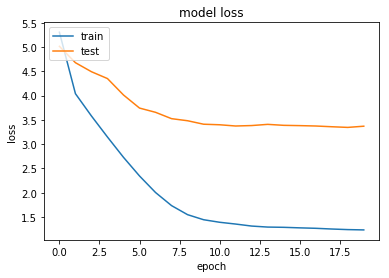

Learning Rate = 0.005


In [795]:
# history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print("Learning Rate = 0.005")

In [797]:
from pickle import load
from numpy import array, argmax
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import sentence_bleu

from nltk.translate.bleu_score import SmoothingFunction
chencherry = SmoothingFunction()


# Map an integer to a word
def map_int_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# Predict the target sequence
def predict_sequence(model, tokenizer, source):
    pred = model.predict(source, verbose=0)[0]
    integers = [argmax(vector) for vector in pred]
    target = list()
    for i in integers:
        word = map_int_to_word(i, tokenizer)
        if word is None:
            break
        target.append(word)
    return ' '.join(target)

# Evaluate the model
def evaluate_model(model, tokenizer, source, raw_dataset):
    predicted, actual = list(), list()
    for i, source in enumerate(source):
        source = source.reshape((1, source.shape[0]))
        translation = predict_sequence(model, tokenizer, source)
#         raw_target, raw_source = raw_dataset[i]
        raw_source, raw_target = raw_dataset[i]
        if i < 30:
            print('src=[%s], target=[%s], predicted=[%s]' % (raw_source, raw_target, translation))
        actual.append(raw_target.split())
        predicted.append(translation.split())

    # Bleu Scores
#     print("stuff: ", actual, predicted)
    print('Bleu-1: %f' % corpus_bleu_2(actual, predicted, weights=(1.0, 0, 0, 0),smoothing_function=chencherry.method4))
    print('Bleu-2: %f' % corpus_bleu_2(actual, predicted, weights=(0.5, 0.5, 0, 0),smoothing_function=chencherry.method4))
    print('Bleu-3: %f' % corpus_bleu_2(actual, predicted, weights=(0.3, 0.3, 0.3, 0),smoothing_function=chencherry.method4))
    print('Bleu-4: %f' % corpus_bleu_2(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25),smoothing_function=chencherry.method4))

# Load datasets
# dataset = load_dataset('english-german-both.pkl')
# train = load_dataset('english-german-train.pkl')
# test = load_dataset('english-german-test.pkl')

# dataset = read_data_diff()
# train_ = dataset[:int(len(dataset)*0.9)]
# test_ = dataset[int(len(dataset)*0.9):]


# prepare english tokenizer
# eng_tokenizer = create_tokenizer(dataset_[:, 0])
# eng_vocab_size = len(eng_tokenizer.word_index) + 1
# eng_length = max_length(dataset_[:, 0])

# # prepare german tokenizer
# ger_tokenizer = create_tokenizer(dataset_[:, 1])
# ger_vocab_size = len(ger_tokenizer.word_index) + 1
# ger_length = max_length(dataset_[:, 1])

# # Prepare data
# trainX = encode_sequences(ger_tokenizer, ger_length, train_[:, 1])
# testX = encode_sequences(ger_tokenizer, ger_length, test_[:, 1])

print("loading model....")
model = load_model('model.h5')

print('Testing on trained examples')
evaluate_model(model, eng_tokenizer, trainX, train_)
print('Testing on test examples')
evaluate_model(model, eng_tokenizer, testX, test_)


loading model....
Testing on trained examples
src=[plan du site
], target=[site map
], predicted=[site map]
src=[crédits
], target=[credits
], predicted=[]
src=[english
], target=[français
], predicted=[français français français français]
src=[liens
], target=[links
], predicted=[]
src=[»
], target=["what about trees?
], predicted=[]
src=[mais écoutez bien...
], target=["sound  s boring!"
], predicted=[]
src=[c’est énorme!
], target=[that’s a lot!
], predicted=[]
src=[«wow!»
], target=[wow!
], predicted=[]
src=[le garçon wow!
], target=[boy  wow!
], predicted=[]
src=[merci papa!
], target=[thanks, dad!
], predicted=[thank thank thank thank]
src=[• crédits
], target=[• credits
], predicted=[• • • •]
src=[• english
], target=[• français
], predicted=[• français français français]
src=[• liens
], target=[• links
], predicted=[• • • •]
src=[note :
], target=[note:
], predicted=[note note note note]
src=[◦ les inuits
], target=[◦ the inuit
], predicted=[◦]
src=[◦ le temps
], target=[◦ time

In [ ]:
from __future__ import division

import math
import sys
import fractions
import warnings
from collections import Counter

from nltk.util import ngrams

try:
    fractions.Fraction(0, 1000, _normalize=False)
    from fractions import Fraction
except TypeError:
    from nltk.compat import Fraction


def sentence_bleu(
    references,
    hypothesis,
    weights=(0.25, 0.25, 0.25, 0.25),
    smoothing_function=None,
    auto_reweigh=False,
):
    """
    Calculate BLEU score (Bilingual Evaluation Understudy) from
    Papineni, Kishore, Salim Roukos, Todd Ward, and Wei-Jing Zhu. 2002.
    "BLEU: a method for automatic evaluation of machine translation."
    In Proceedings of ACL. http://www.aclweb.org/anthology/P02-1040.pdf

    >>> hypothesis1 = ['It', 'is', 'a', 'guide', 'to', 'action', 'which',
    ...               'ensures', 'that', 'the', 'military', 'always',
    ...               'obeys', 'the', 'commands', 'of', 'the', 'party']

    >>> hypothesis2 = ['It', 'is', 'to', 'insure', 'the', 'troops',
    ...               'forever', 'hearing', 'the', 'activity', 'guidebook',
    ...               'that', 'party', 'direct']

    >>> reference1 = ['It', 'is', 'a', 'guide', 'to', 'action', 'that',
    ...               'ensures', 'that', 'the', 'military', 'will', 'forever',
    ...               'heed', 'Party', 'commands']

    >>> reference2 = ['It', 'is', 'the', 'guiding', 'principle', 'which',
    ...               'guarantees', 'the', 'military', 'forces', 'always',
    ...               'being', 'under', 'the', 'command', 'of', 'the',
    ...               'Party']

    >>> reference3 = ['It', 'is', 'the', 'practical', 'guide', 'for', 'the',
    ...               'army', 'always', 'to', 'heed', 'the', 'directions',
    ...               'of', 'the', 'party']

    >>> sentence_bleu([reference1, reference2, reference3], hypothesis1) # doctest: +ELLIPSIS
    0.5045...

    If there is no ngrams overlap for any order of n-grams, BLEU returns the
    value 0. This is because the precision for the order of n-grams without
    overlap is 0, and the geometric mean in the final BLEU score computation
    multiplies the 0 with the precision of other n-grams. This results in 0
    (independently of the precision of the othe n-gram orders). The following
    example has zero 3-gram and 4-gram overlaps:

    >>> round(sentence_bleu([reference1, reference2, reference3], hypothesis2),4) # doctest: +ELLIPSIS
    0.0

    To avoid this harsh behaviour when no ngram overlaps are found a smoothing
    function can be used.

    >>> chencherry = SmoothingFunction()
    >>> sentence_bleu([reference1, reference2, reference3], hypothesis2,
    ...     smoothing_function=chencherry.method1) # doctest: +ELLIPSIS
    0.0370...

    The default BLEU calculates a score for up to 4-grams using uniform
    weights (this is called BLEU-4). To evaluate your translations with
    higher/lower order ngrams, use customized weights. E.g. when accounting
    for up to 5-grams with uniform weights (this is called BLEU-5) use:

    >>> weights = (1./5., 1./5., 1./5., 1./5., 1./5.)
    >>> sentence_bleu([reference1, reference2, reference3], hypothesis1, weights) # doctest: +ELLIPSIS
    0.3920...

    :param references: reference sentences
    :type references: list(list(str))
    :param hypothesis: a hypothesis sentence
    :type hypothesis: list(str)
    :param weights: weights for unigrams, bigrams, trigrams and so on
    :type weights: list(float)
    :param smoothing_function:
    :type smoothing_function: SmoothingFunction
    :param auto_reweigh: Option to re-normalize the weights uniformly.
    :type auto_reweigh: bool
    :return: The sentence-level BLEU score.
    :rtype: float
    """
    return corpus_bleu(
        [references], [hypothesis], weights, smoothing_function, auto_reweigh
    )



def corpus_bleu_2(
    list_of_references,
    hypotheses,
    weights=(0.25, 0.25, 0.25, 0.25),
    smoothing_function=None,
    auto_reweigh=False,
):
    """
    Calculate a single corpus-level BLEU score (aka. system-level BLEU) for all
    the hypotheses and their respective references.

    Instead of averaging the sentence level BLEU scores (i.e. marco-average
    precision), the original BLEU metric (Papineni et al. 2002) accounts for
    the micro-average precision (i.e. summing the numerators and denominators
    for each hypothesis-reference(s) pairs before the division).

    >>> hyp1 = ['It', 'is', 'a', 'guide', 'to', 'action', 'which',
    ...         'ensures', 'that', 'the', 'military', 'always',
    ...         'obeys', 'the', 'commands', 'of', 'the', 'party']
    >>> ref1a = ['It', 'is', 'a', 'guide', 'to', 'action', 'that',
    ...          'ensures', 'that', 'the', 'military', 'will', 'forever',
    ...          'heed', 'Party', 'commands']
    >>> ref1b = ['It', 'is', 'the', 'guiding', 'principle', 'which',
    ...          'guarantees', 'the', 'military', 'forces', 'always',
    ...          'being', 'under', 'the', 'command', 'of', 'the', 'Party']
    >>> ref1c = ['It', 'is', 'the', 'practical', 'guide', 'for', 'the',
    ...          'army', 'always', 'to', 'heed', 'the', 'directions',
    ...          'of', 'the', 'party']

    >>> hyp2 = ['he', 'read', 'the', 'book', 'because', 'he', 'was',
    ...         'interested', 'in', 'world', 'history']
    >>> ref2a = ['he', 'was', 'interested', 'in', 'world', 'history',
    ...          'because', 'he', 'read', 'the', 'book']

    >>> list_of_references = [[ref1a, ref1b, ref1c], [ref2a]]
    >>> hypotheses = [hyp1, hyp2]
    >>> corpus_bleu(list_of_references, hypotheses) # doctest: +ELLIPSIS
    0.5920...

    The example below show that corpus_bleu() is different from averaging
    sentence_bleu() for hypotheses

    >>> score1 = sentence_bleu([ref1a, ref1b, ref1c], hyp1)
    >>> score2 = sentence_bleu([ref2a], hyp2)
    >>> (score1 + score2) / 2 # doctest: +ELLIPSIS
    0.6223...

    :param list_of_references: a corpus of lists of reference sentences, w.r.t. hypotheses
    :type list_of_references: list(list(list(str)))
    :param hypotheses: a list of hypothesis sentences
    :type hypotheses: list(list(str))
    :param weights: weights for unigrams, bigrams, trigrams and so on
    :type weights: list(float)
    :param smoothing_function:
    :type smoothing_function: SmoothingFunction
    :param auto_reweigh: Option to re-normalize the weights uniformly.
    :type auto_reweigh: bool
    :return: The corpus-level BLEU score.
    :rtype: float
    """
    # Before proceeding to compute BLEU, perform sanity checks.

    p_numerators = Counter()  # Key = ngram order, and value = no. of ngram matches.
    p_denominators = Counter()  # Key = ngram order, and value = no. of ngram in ref.
    hyp_lengths, ref_lengths = 0, 0

    assert len(list_of_references) == len(hypotheses), (
        "The number of hypotheses and their reference(s) should be the " "same "
    )

#     print("list of references: ", list_of_references)
    # Iterate through each hypothesis and their corresponding references.
    for references, hypothesis in zip(list_of_references, hypotheses):
        # For each order of ngram, calculate the numerator and
        # denominator for the corpus-level modified precision.
        references = [references]
#         print("references that we are passing into things: ", references)
        for i, _ in enumerate(weights, start=1):
            p_i = modified_precision(references, hypothesis, i)
            p_numerators[i] += p_i.numerator
            p_denominators[i] += p_i.denominator

        # Calculate the hypothesis length and the closest reference length.
        # Adds them to the corpus-level hypothesis and reference counts.
        hyp_len = len(hypothesis)
        hyp_lengths += hyp_len
        ref_lengths += closest_ref_length(references, hyp_len)

    # Calculate corpus-level brevity penalty.
    bp = brevity_penalty(ref_lengths, hyp_lengths)

    # Uniformly re-weighting based on maximum hypothesis lengths if largest
    # order of n-grams < 4 and weights is set at default.
    if auto_reweigh:
        if hyp_lengths < 4 and weights == (0.25, 0.25, 0.25, 0.25):
            weights = (1 / hyp_lengths,) * hyp_lengths

    # Collects the various precision values for the different ngram orders.
    p_n = [
        Fraction(p_numerators[i], p_denominators[i], _normalize=False)
        for i, _ in enumerate(weights, start=1)
    ]
    
#     print("pn: ", p_n)
#     print("p_numerators: ", p_numerators)

    # Returns 0 if there's no matching n-grams
    # We only need to check for p_numerators[1] == 0, since if there's
    # no unigrams, there won't be any higher order ngrams.
    if p_numerators[1] == 0:
        print("returning 0 in p_numberators case")
        return 0

    # If there's no smoothing, set use method0 from SmoothinFunction class.
    if not smoothing_function:
        smoothing_function = SmoothingFunction().method0
    # Smoothen the modified precision.
    # Note: smoothing_function() may convert values into floats;
    #       it tries to retain the Fraction object as much as the
    #       smoothing method allows.
    p_n = smoothing_function(
        p_n, references=references, hypothesis=hypothesis, hyp_len=hyp_lengths
    )
    s = (w_i * math.log(p_i) for w_i, p_i in zip(weights, p_n))
    s = bp * math.exp(math.fsum(s))
    return s


def modified_precision(references, hypothesis, n):
    """
    Calculate modified ngram precision.

    The normal precision method may lead to some wrong translations with
    high-precision, e.g., the translation, in which a word of reference
    repeats several times, has very high precision.

    This function only returns the Fraction object that contains the numerator
    and denominator necessary to calculate the corpus-level precision.
    To calculate the modified precision for a single pair of hypothesis and
    references, cast the Fraction object into a float.

    The famous "the the the ... " example shows that you can get BLEU precision
    by duplicating high frequency words.

        >>> reference1 = 'the cat is on the mat'.split()
        >>> reference2 = 'there is a cat on the mat'.split()
        >>> hypothesis1 = 'the the the the the the the'.split()
        >>> references = [reference1, reference2]
        >>> float(modified_precision(references, hypothesis1, n=1)) # doctest: +ELLIPSIS
        0.2857...

    In the modified n-gram precision, a reference word will be considered
    exhausted after a matching hypothesis word is identified, e.g.

        >>> reference1 = ['It', 'is', 'a', 'guide', 'to', 'action', 'that',
        ...               'ensures', 'that', 'the', 'military', 'will',
        ...               'forever', 'heed', 'Party', 'commands']
        >>> reference2 = ['It', 'is', 'the', 'guiding', 'principle', 'which',
        ...               'guarantees', 'the', 'military', 'forces', 'always',
        ...               'being', 'under', 'the', 'command', 'of', 'the',
        ...               'Party']
        >>> reference3 = ['It', 'is', 'the', 'practical', 'guide', 'for', 'the',
        ...               'army', 'always', 'to', 'heed', 'the', 'directions',
        ...               'of', 'the', 'party']
        >>> hypothesis = 'of the'.split()
        >>> references = [reference1, reference2, reference3]
        >>> float(modified_precision(references, hypothesis, n=1))
        1.0
        >>> float(modified_precision(references, hypothesis, n=2))
        1.0

    An example of a normal machine translation hypothesis:

        >>> hypothesis1 = ['It', 'is', 'a', 'guide', 'to', 'action', 'which',
        ...               'ensures', 'that', 'the', 'military', 'always',
        ...               'obeys', 'the', 'commands', 'of', 'the', 'party']

        >>> hypothesis2 = ['It', 'is', 'to', 'insure', 'the', 'troops',
        ...               'forever', 'hearing', 'the', 'activity', 'guidebook',
        ...               'that', 'party', 'direct']

        >>> reference1 = ['It', 'is', 'a', 'guide', 'to', 'action', 'that',
        ...               'ensures', 'that', 'the', 'military', 'will',
        ...               'forever', 'heed', 'Party', 'commands']

        >>> reference2 = ['It', 'is', 'the', 'guiding', 'principle', 'which',
        ...               'guarantees', 'the', 'military', 'forces', 'always',
        ...               'being', 'under', 'the', 'command', 'of', 'the',
        ...               'Party']

        >>> reference3 = ['It', 'is', 'the', 'practical', 'guide', 'for', 'the',
        ...               'army', 'always', 'to', 'heed', 'the', 'directions',
        ...               'of', 'the', 'party']
        >>> references = [reference1, reference2, reference3]
        >>> float(modified_precision(references, hypothesis1, n=1)) # doctest: +ELLIPSIS
        0.9444...
        >>> float(modified_precision(references, hypothesis2, n=1)) # doctest: +ELLIPSIS
        0.5714...
        >>> float(modified_precision(references, hypothesis1, n=2)) # doctest: +ELLIPSIS
        0.5882352941176471
        >>> float(modified_precision(references, hypothesis2, n=2)) # doctest: +ELLIPSIS
        0.07692...


    :param references: A list of reference translations.
    :type references: list(list(str))
    :param hypothesis: A hypothesis translation.
    :type hypothesis: list(str)
    :param n: The ngram order.
    :type n: int
    :return: BLEU's modified precision for the nth order ngram.
    :rtype: Fraction
    """
    # Extracts all ngrams in hypothesis
    # Set an empty Counter if hypothesis is empty.
    counts = Counter(ngrams(hypothesis, n)) if len(hypothesis) >= n else Counter()
#     print("COUNTS: ", counts)
    # Extract a union of references' counts.
    # max_counts = reduce(or_, [Counter(ngrams(ref, n)) for ref in references])
    max_counts = {}
    for reference in references:
        reference_counts = (
            Counter(ngrams(reference, n)) if len(reference) >= n else Counter()
        )
#         print("REFERENCE: ", reference)
#         print("reference counts: ", reference_counts)
        for ngram in counts:
            max_counts[ngram] = max(max_counts.get(ngram, 0), reference_counts[ngram])

    # Assigns the intersection between hypothesis and references' counts.
    clipped_counts = {
        ngram: min(count, max_counts[ngram]) for ngram, count in counts.items()
    }
#     print("max counts: ", max_counts)
#     print("clipped counts: ", clipped_counts)

    numerator = sum(clipped_counts.values())
    # Ensures that denominator is minimum 1 to avoid ZeroDivisionError.
    # Usually this happens when the ngram order is > len(reference).
    denominator = max(1, sum(counts.values()))

    return Fraction(numerator, denominator, _normalize=False)



def closest_ref_length(references, hyp_len):
    """
    This function finds the reference that is the closest length to the
    hypothesis. The closest reference length is referred to as *r* variable
    from the brevity penalty formula in Papineni et. al. (2002)

    :param references: A list of reference translations.
    :type references: list(list(str))
    :param hyp_len: The length of the hypothesis.
    :type hyp_len: int
    :return: The length of the reference that's closest to the hypothesis.
    :rtype: int
    """
    ref_lens = (len(reference) for reference in references)
    closest_ref_len = min(
        ref_lens, key=lambda ref_len: (abs(ref_len - hyp_len), ref_len)
    )
    return closest_ref_len



def brevity_penalty(closest_ref_len, hyp_len):
    """
    Calculate brevity penalty.

    As the modified n-gram precision still has the problem from the short
    length sentence, brevity penalty is used to modify the overall BLEU
    score according to length.

    An example from the paper. There are three references with length 12, 15
    and 17. And a concise hypothesis of the length 12. The brevity penalty is 1.

        >>> reference1 = list('aaaaaaaaaaaa')      # i.e. ['a'] * 12
        >>> reference2 = list('aaaaaaaaaaaaaaa')   # i.e. ['a'] * 15
        >>> reference3 = list('aaaaaaaaaaaaaaaaa') # i.e. ['a'] * 17
        >>> hypothesis = list('aaaaaaaaaaaa')      # i.e. ['a'] * 12
        >>> references = [reference1, reference2, reference3]
        >>> hyp_len = len(hypothesis)
        >>> closest_ref_len =  closest_ref_length(references, hyp_len)
        >>> brevity_penalty(closest_ref_len, hyp_len)
        1.0

    In case a hypothesis translation is shorter than the references, penalty is
    applied.

        >>> references = [['a'] * 28, ['a'] * 28]
        >>> hypothesis = ['a'] * 12
        >>> hyp_len = len(hypothesis)
        >>> closest_ref_len =  closest_ref_length(references, hyp_len)
        >>> brevity_penalty(closest_ref_len, hyp_len)
        0.2635971381157267

    The length of the closest reference is used to compute the penalty. If the
    length of a hypothesis is 12, and the reference lengths are 13 and 2, the
    penalty is applied because the hypothesis length (12) is less then the
    closest reference length (13).

        >>> references = [['a'] * 13, ['a'] * 2]
        >>> hypothesis = ['a'] * 12
        >>> hyp_len = len(hypothesis)
        >>> closest_ref_len =  closest_ref_length(references, hyp_len)
        >>> brevity_penalty(closest_ref_len, hyp_len) # doctest: +ELLIPSIS
        0.9200...

    The brevity penalty doesn't depend on reference order. More importantly,
    when two reference sentences are at the same distance, the shortest
    reference sentence length is used.

        >>> references = [['a'] * 13, ['a'] * 11]
        >>> hypothesis = ['a'] * 12
        >>> hyp_len = len(hypothesis)
        >>> closest_ref_len =  closest_ref_length(references, hyp_len)
        >>> bp1 = brevity_penalty(closest_ref_len, hyp_len)
        >>> hyp_len = len(hypothesis)
        >>> closest_ref_len =  closest_ref_length(reversed(references), hyp_len)
        >>> bp2 = brevity_penalty(closest_ref_len, hyp_len)
        >>> bp1 == bp2 == 1
        True

    A test example from mteval-v13a.pl (starting from the line 705):

        >>> references = [['a'] * 11, ['a'] * 8]
        >>> hypothesis = ['a'] * 7
        >>> hyp_len = len(hypothesis)
        >>> closest_ref_len =  closest_ref_length(references, hyp_len)
        >>> brevity_penalty(closest_ref_len, hyp_len) # doctest: +ELLIPSIS
        0.8668...

        >>> references = [['a'] * 11, ['a'] * 8, ['a'] * 6, ['a'] * 7]
        >>> hypothesis = ['a'] * 7
        >>> hyp_len = len(hypothesis)
        >>> closest_ref_len =  closest_ref_length(references, hyp_len)
        >>> brevity_penalty(closest_ref_len, hyp_len)
        1.0

    :param hyp_len: The length of the hypothesis for a single sentence OR the
    sum of all the hypotheses' lengths for a corpus
    :type hyp_len: int
    :param closest_ref_len: The length of the closest reference for a single
    hypothesis OR the sum of all the closest references for every hypotheses.
    :type closest_ref_len: int
    :return: BLEU's brevity penalty.
    :rtype: float
    """
    if hyp_len > closest_ref_len:
        return 1
    # If hypothesis is empty, brevity penalty = 0 should result in BLEU = 0.0
    elif hyp_len == 0:
        return 0
    else:
        return math.exp(1 - closest_ref_len / hyp_len)



class SmoothingFunction:
    """
    This is an implementation of the smoothing techniques
    for segment-level BLEU scores that was presented in
    Boxing Chen and Collin Cherry (2014) A Systematic Comparison of
    Smoothing Techniques for Sentence-Level BLEU. In WMT14.
    http://acl2014.org/acl2014/W14-33/pdf/W14-3346.pdf
    """

    def __init__(self, epsilon=0.1, alpha=5, k=5):
        """
        This will initialize the parameters required for the various smoothing
        techniques, the default values are set to the numbers used in the
        experiments from Chen and Cherry (2014).

        >>> hypothesis1 = ['It', 'is', 'a', 'guide', 'to', 'action', 'which', 'ensures',
        ...                 'that', 'the', 'military', 'always', 'obeys', 'the',
        ...                 'commands', 'of', 'the', 'party']
        >>> reference1 = ['It', 'is', 'a', 'guide', 'to', 'action', 'that', 'ensures',
        ...               'that', 'the', 'military', 'will', 'forever', 'heed',
        ...               'Party', 'commands']

        >>> chencherry = SmoothingFunction()
        >>> print (sentence_bleu([reference1], hypothesis1)) # doctest: +ELLIPSIS
        0.4118...
        >>> print (sentence_bleu([reference1], hypothesis1, smoothing_function=chencherry.method0)) # doctest: +ELLIPSIS
        0.4118...
        >>> print (sentence_bleu([reference1], hypothesis1, smoothing_function=chencherry.method1)) # doctest: +ELLIPSIS
        0.4118...
        >>> print (sentence_bleu([reference1], hypothesis1, smoothing_function=chencherry.method2)) # doctest: +ELLIPSIS
        0.4489...
        >>> print (sentence_bleu([reference1], hypothesis1, smoothing_function=chencherry.method3)) # doctest: +ELLIPSIS
        0.4118...
        >>> print (sentence_bleu([reference1], hypothesis1, smoothing_function=chencherry.method4)) # doctest: +ELLIPSIS
        0.4118...
        >>> print (sentence_bleu([reference1], hypothesis1, smoothing_function=chencherry.method5)) # doctest: +ELLIPSIS
        0.4905...
        >>> print (sentence_bleu([reference1], hypothesis1, smoothing_function=chencherry.method6)) # doctest: +ELLIPSIS
        0.4135...
        >>> print (sentence_bleu([reference1], hypothesis1, smoothing_function=chencherry.method7)) # doctest: +ELLIPSIS
        0.4905...

        :param epsilon: the epsilon value use in method 1
        :type epsilon: float
        :param alpha: the alpha value use in method 6
        :type alpha: int
        :param k: the k value use in method 4
        :type k: int
        """
        self.epsilon = epsilon
        self.alpha = alpha
        self.k = k

    def method0(self, p_n, *args, **kwargs):
        """
        No smoothing.
        """
        p_n_new = []
        for i, p_i in enumerate(p_n):
            if p_i.numerator != 0:
                p_n_new.append(p_i)
            else:
                _msg = str(
                    "\nThe hypothesis contains 0 counts of {}-gram overlaps.\n"
                    "Therefore the BLEU score evaluates to 0, independently of\n"
                    "how many N-gram overlaps of lower order it contains.\n"
                    "Consider using lower n-gram order or use "
                    "SmoothingFunction()"
                ).format(i + 1)
                warnings.warn(_msg)
                # When numerator==0 where denonminator==0 or !=0, the result
                # for the precision score should be equal to 0 or undefined.
                # Due to BLEU geometric mean computation in logarithm space,
                # we we need to take the return sys.float_info.min such that
                # math.log(sys.float_info.min) returns a 0 precision score.
                p_n_new.append(sys.float_info.min)
        return p_n_new


    def method1(self, p_n, *args, **kwargs):
        """
        Smoothing method 1: Add *epsilon* counts to precision with 0 counts.
        """
        return [
            (p_i.numerator + self.epsilon) / p_i.denominator
            if p_i.numerator == 0
            else p_i
            for p_i in p_n
        ]


    def method2(self, p_n, *args, **kwargs):
        """
        Smoothing method 2: Add 1 to both numerator and denominator from
        Chin-Yew Lin and Franz Josef Och (2004) Automatic evaluation of
        machine translation quality using longest common subsequence and
        skip-bigram statistics. In ACL04.
        """
        return [
            Fraction(p_i.numerator + 1, p_i.denominator + 1, _normalize=False)
            for p_i in p_n
        ]


    def method3(self, p_n, *args, **kwargs):
        """
        Smoothing method 3: NIST geometric sequence smoothing
        The smoothing is computed by taking 1 / ( 2^k ), instead of 0, for each
        precision score whose matching n-gram count is null.
        k is 1 for the first 'n' value for which the n-gram match count is null/
        For example, if the text contains:
         - one 2-gram match
         - and (consequently) two 1-gram matches
        the n-gram count for each individual precision score would be:
         - n=1  =>  prec_count = 2     (two unigrams)
         - n=2  =>  prec_count = 1     (one bigram)
         - n=3  =>  prec_count = 1/2   (no trigram,  taking 'smoothed' value of 1 / ( 2^k ), with k=1)
         - n=4  =>  prec_count = 1/4   (no fourgram, taking 'smoothed' value of 1 / ( 2^k ), with k=2)
        """
        incvnt = 1  # From the mteval-v13a.pl, it's referred to as k.
        for i, p_i in enumerate(p_n):
            if p_i.numerator == 0:
                p_n[i] = 1 / (2 ** incvnt * p_i.denominator)
                incvnt += 1
        return p_n


    def method4(self, p_n, references, hypothesis, hyp_len, *args, **kwargs):
        """
        Smoothing method 4:
        Shorter translations may have inflated precision values due to having
        smaller denominators; therefore, we give them proportionally
        smaller smoothed counts. Instead of scaling to 1/(2^k), Chen and Cherry
        suggests dividing by 1/ln(len(T)), where T is the length of the translation.
        """
        for i, p_i in enumerate(p_n):
            if p_i.numerator == 0 and hyp_len != 0:
                incvnt = i + 1 * self.k / math.log(
                    hyp_len
                )  # Note that this K is different from the K from NIST.
                p_n[i] = 1 / incvnt
        return p_n

    def method5(self, p_n, references, hypothesis, hyp_len, *args, **kwargs):
        """
        Smoothing method 5:
        The matched counts for similar values of n should be similar. To a
        calculate the n-gram matched count, it averages the n−1, n and n+1 gram
        matched counts.
        """
        m = {}
        # Requires an precision value for an addition ngram order.
        p_n_plus1 = p_n + [modified_precision(references, hypothesis, 5)]
        m[-1] = p_n[0] + 1
        for i, p_i in enumerate(p_n):
            p_n[i] = (m[i - 1] + p_i + p_n_plus1[i + 1]) / 3
            m[i] = p_n[i]
        return p_n


    def method6(self, p_n, references, hypothesis, hyp_len, *args, **kwargs):
        """
        Smoothing method 6:
        Interpolates the maximum likelihood estimate of the precision *p_n* with
        a prior estimate *pi0*. The prior is estimated by assuming that the ratio
        between pn and pn−1 will be the same as that between pn−1 and pn−2; from
        Gao and He (2013) Training MRF-Based Phrase Translation Models using
        Gradient Ascent. In NAACL.
        """
        # This smoothing only works when p_1 and p_2 is non-zero.
        # Raise an error with an appropriate message when the input is too short
        # to use this smoothing technique.
        assert p_n[2], "This smoothing method requires non-zero precision for bigrams."
        for i, p_i in enumerate(p_n):
            if i in [0, 1]:  # Skips the first 2 orders of ngrams.
                continue
            else:
                pi0 = 0 if p_n[i - 2] == 0 else p_n[i - 1] ** 2 / p_n[i - 2]
                # No. of ngrams in translation that matches the reference.
                m = p_i.numerator
                # No. of ngrams in translation.
                l = sum(1 for _ in ngrams(hypothesis, i + 1))
                # Calculates the interpolated precision.
                p_n[i] = (m + self.alpha * pi0) / (l + self.alpha)
        return p_n

    def method7(self, p_n, references, hypothesis, hyp_len, *args, **kwargs):
        """
        Smoothing method 6:
        Interpolates the maximum likelihood estimate of the precision *p_n* with
        a prior estimate *pi0*. The prior is estimated by assuming that the ratio
        between pn and pn−1 will be the same as that between pn−1 and pn−2.
        """
        p_n = self.method4(p_n, references, hypothesis, hyp_len)
        p_n = self.method5(p_n, references, hypothesis, hyp_len)
        return p_n  
  

In [281]:
from nltk.translate.bleu_score import sentence_bleu
reference = [['this', 'is', 'a', 'test'], ['this', 'is' 'test']]
candidate = ['this', 'is', 'a', 'test']
score = sentence_bleu(reference, candidate)
print(score)

1.0


In [492]:
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
print(stemmer.stem('voudrais'))
print(stemmer.stem('animaux'))
print(stemmer.stem('yeux'))
print(stemmer.stem('dors'))
print(stemmer.stem('couvre'))


voudr
animal
yeux
dor
couvr
